In [2]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.8 MB/s eta 0:00:00


In [3]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 28.3 MB/s eta 0:00:00


In [4]:
pip install pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0d4907384357136f4787493b3c06880181c8760048592e434764dd0b542f6186
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [32]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit_aer import Aer as BasicAer
# from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram


In [33]:
q = QuantumRegister(9)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [34]:
qc.x(q[5])
qc.h(q[0:6])
qc.barrier(q)

In [35]:
qc.barrier(q)

# build oracle. ex: to find 10101 state
qc.x(q[1])
qc.x(q[3])
qc.barrier(q)
# qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])    # control qubits, target qubit, ancilla qubits = number of control qubits - 2
qc.ccx(q[0], q[1], q[5])
qc.ccx(q[5], q[2], q[6])
qc.ccx(q[6], q[3], q[7])
qc.ccx(q[7], q[4], q[8])


qc.barrier(q)
qc.x(q[1])
qc.x(q[3])

qc.barrier(q)

In [36]:
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
# qc.mct([q[0], q[1], q[2], q[3], q[4]], q[5], q[6:9])
qc.ccx(0, 1, 6)
qc.ccx(6, 2, 7)
qc.ccx(7, 3, 8)
qc.cx(8, 5)
qc.ccx(7, 3, 8)
qc.ccx(6, 2, 7)
qc.ccx(0, 1, 6)

qc.barrier(q)
qc.h(q[4])
qc.barrier(q)
qc.x(q[0:5])
qc.barrier(q)
qc.h(q[0:5])
qc.barrier(q)

In [37]:
qc.measure(q[0:5], c[0:5])

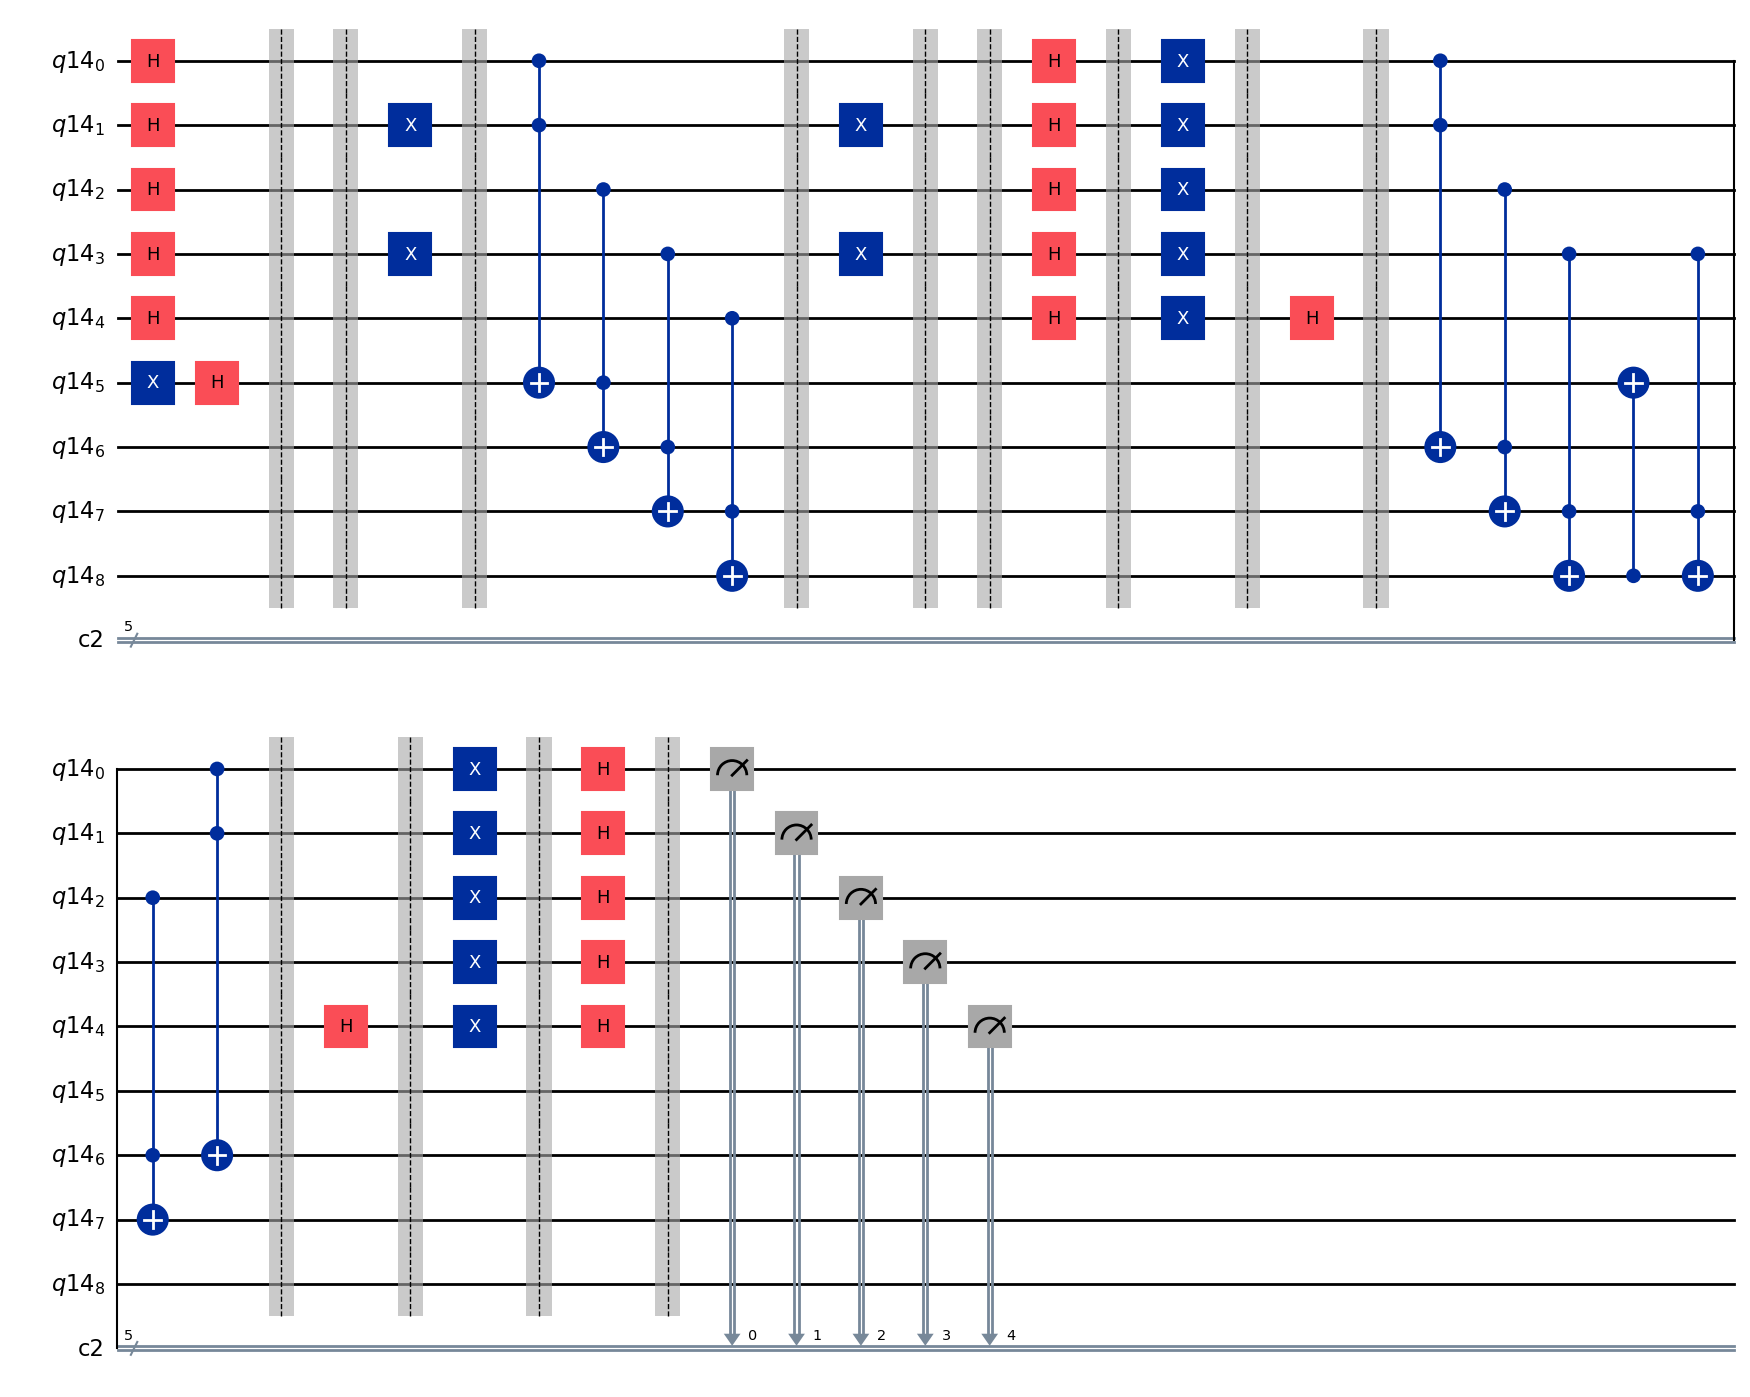

In [38]:
qc.draw(output='mpl')

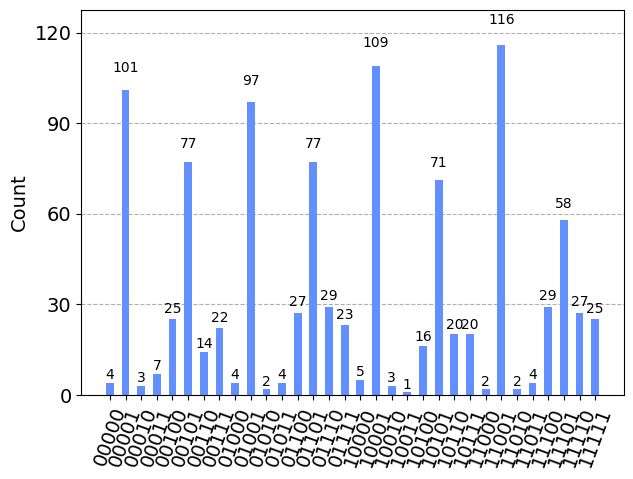

In [39]:
backend = BasicAer.get_backend('qasm_simulator')

transpiled_circuit = transpile(qc, backend)

qobj = transpile(transpiled_circuit)

job = backend.run(qobj)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)